In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [276]:
data = pd.read_csv('D:/Machine Learning/Dicision Tree/Heart Disease Prediction/HeartDisease.csv')

In [277]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [278]:
data.shape

(303, 14)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [280]:
data.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [281]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

Text(0.5, 1.0, 'Heat Map of Nulls')

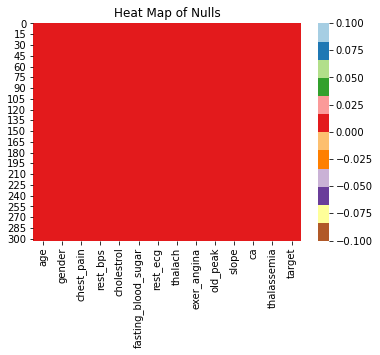

In [282]:
sns.heatmap(data.isnull(), cmap = 'Paired_r')
plt.title('Heat Map of Nulls')

# 

# 

# Response / Target Variable

# target

In [283]:
data.target.isnull().sum()

0

In [284]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [285]:
data.target.value_counts().sum()

303

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of target')

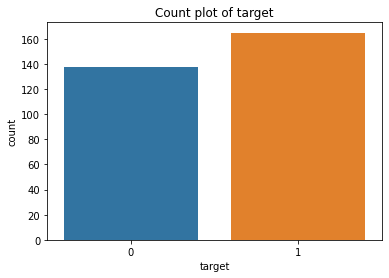

In [286]:
sns.countplot(data.target)
plt.title('Count plot of target')

# 

# 

# 0) age

In [287]:
data.age.isnull().sum()

0

In [288]:
data.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [289]:
data.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

Text(0.5, 1.0, 'Histogram of age')

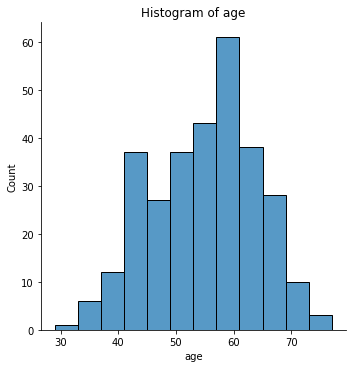

In [290]:
sns.displot(data.age)
plt.title('Histogram of age')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution plot of age')

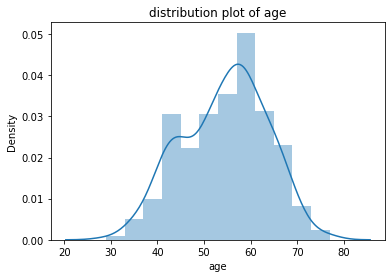

In [291]:
sns.distplot(data.age)
plt.title('Distribution plot of age')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of age')

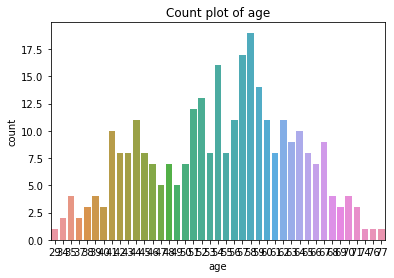

In [292]:
sns.countplot(data.age)
plt.title('Count plot of age')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of age')

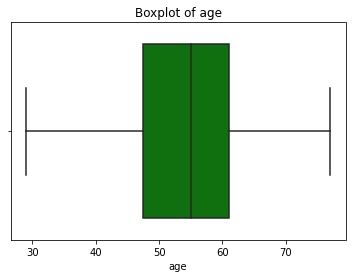

In [293]:
sns.boxplot(data.age, color = 'g')
plt.title('Boxplot of age')

In [294]:
data.groupby('age')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
29,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
34,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
35,4.0,0.500000,0.577350,0.0,0.00,0.5,1.00,1.0
37,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
38,3.0,0.666667,0.577350,0.0,0.50,1.0,1.00,1.0
39,4.0,0.750000,0.500000,0.0,0.75,1.0,1.00,1.0
40,3.0,0.333333,0.577350,0.0,0.00,0.0,0.50,1.0
41,10.0,0.900000,0.316228,0.0,1.00,1.0,1.00,1.0
42,8.0,0.875000,0.353553,0.0,1.00,1.0,1.00,1.0


In [295]:
cat_1 = data[data['target'] == 0]
cat_2 = data[data['target'] == 1]

ttest_ind(cat_1.age, cat_1.age)

Ttest_indResult(statistic=0.0, pvalue=1.0)

**NOT A GOOD PREDICTOR**

# 

# 

# 1) gender

In [296]:
data.gender.isnull().sum()

0

In [297]:
data.gender.value_counts()

1    207
0     96
Name: gender, dtype: int64

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of gender')

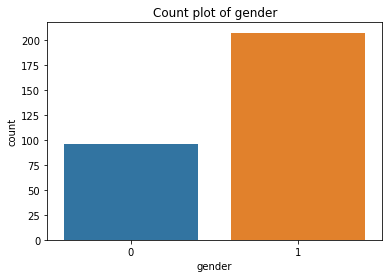

In [298]:
sns.countplot(data.gender)
plt.title('Count plot of gender')

In [299]:
ct_g = pd.crosstab(data.gender, data.target)
ct_g

target,0,1
gender,,
0,24,72
1,114,93


In [300]:
chi2_contingency(ct_g, correction = False)

(23.914383914761988,
 1.0071642033238865e-06,
 1,
 array([[ 43.72277228,  52.27722772],
        [ 94.27722772, 112.72277228]]))

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'gender VS target')

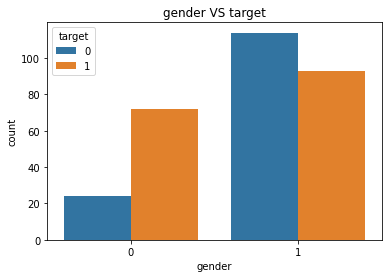

In [301]:
sns.countplot(data.gender, hue = data.target)
plt.title('gender VS target')

**GOOD PREDICTOR** 

# 

# 

# 2) chest_pain

In [302]:
data.chest_pain.isnull().sum()

0

In [303]:
data.chest_pain.describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: chest_pain, dtype: float64

In [304]:
data.chest_pain.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

In [305]:
data.chest_pain.value_counts().sum()

303

Text(0.5, 1.0, 'Histogram of chest_pain')

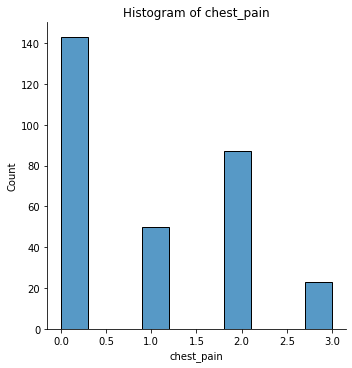

In [306]:
sns.displot(data.chest_pain)
plt.title('Histogram of chest_pain')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution plo of chest_pain')

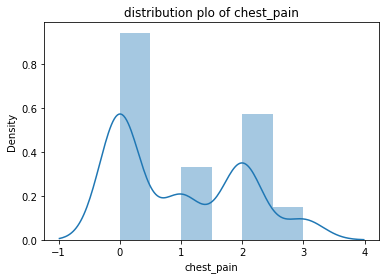

In [307]:
sns.distplot(data.chest_pain)
plt.title('distribution plo of chest_pain')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of chest_pain')

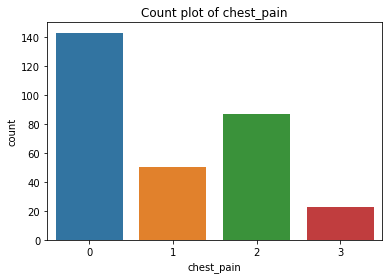

In [308]:
sns.countplot(data.chest_pain)
plt.title('Count plot of chest_pain')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of chest_pain')

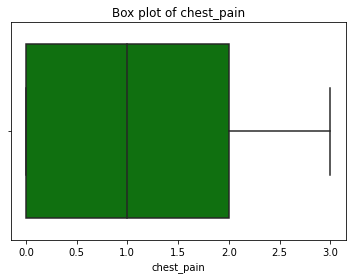

In [309]:
sns.boxplot(data.chest_pain, color = 'g')
plt.title('Box plot of chest_pain')

In [310]:
data.groupby('chest_pain')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
chest_pain,,,,,,,,
0,143.0,0.272727,0.446927,0.0,0.0,0.0,1.0,1.0
1,50.0,0.820000,0.388088,0.0,1.0,1.0,1.0,1.0
2,87.0,0.793103,0.407429,0.0,1.0,1.0,1.0,1.0
3,23.0,0.695652,0.470472,0.0,0.0,1.0,1.0,1.0


In [311]:
cat_1 = data[data['target'] == 0]
cat_2 = data[data['target'] == 1]

ttest_ind(cat_1.chest_pain, cat_2.chest_pain)

Ttest_indResult(statistic=-8.352979797236767, pvalue=2.4697121089225667e-15)

**GOOD PREDICTOR** 

# 

# 

# 3) rest_bps

In [312]:
data.rest_bps.isnull().sum()

0

In [313]:
data.rest_bps.describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: rest_bps, dtype: float64

In [314]:
data.rest_bps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165     1
164     1
106     1
156     1
155     1
154     1
114     1
117     1
123     1
200     1
Name: rest_bps, dtype: int64

Text(0.5, 1.0, 'Histogram of rest_bps')

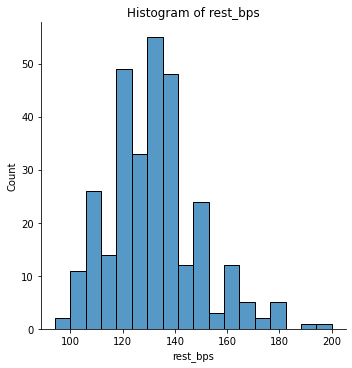

In [315]:
sns.displot(data.rest_bps)
plt.title('Histogram of rest_bps')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of rest_bps')

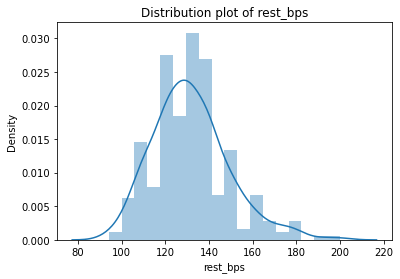

In [316]:
sns.distplot(data.rest_bps)
plt.title('Distribution plot of rest_bps')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of rest_bps')

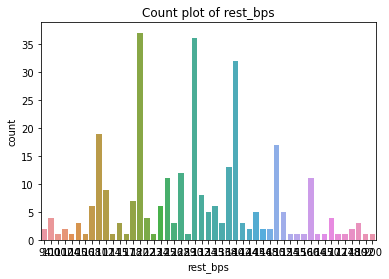

In [317]:
sns.countplot(data.rest_bps)
plt.title('Count plot of rest_bps')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of rest_bps')

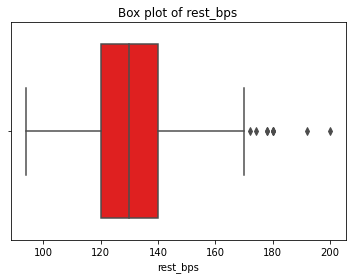

In [318]:
sns.boxplot(data.rest_bps, color = 'r')
plt.title('Box plot of rest_bps')

In [319]:
Q1 = data.rest_bps.quantile(.25)
Q3 = data.rest_bps.quantile(.75)

In [320]:
IQR = Q3 - Q1
IQR

20.0

In [321]:
upper_limit = Q3 + (1.5 * IQR)
upper_limit

170.0

In [322]:
len(data[data.rest_bps > upper_limit])

9

In [323]:
data['rest_bps'] = np.where(data['rest_bps']>upper_limit, upper_limit, data['rest_bps'])

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of rest_bps')

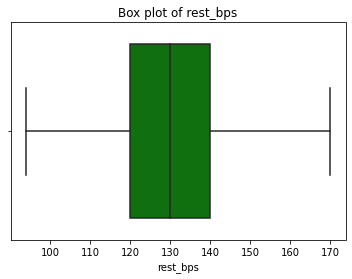

In [324]:
sns.boxplot(data.rest_bps, color = 'g')
plt.title('Box plot of rest_bps')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of rest_bps')

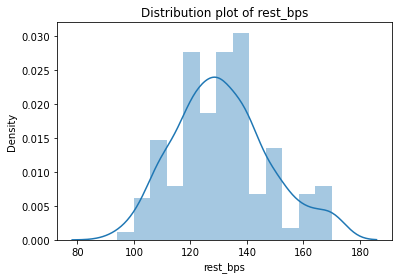

In [325]:
sns.distplot(data.rest_bps)
plt.title('Distribution plot of rest_bps')

In [326]:
data.groupby('rest_bps')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
rest_bps,,,,,,,,
94.0,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
100.0,4.0,0.500000,0.577350,0.0,0.00,0.5,1.00,1.0
101.0,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
102.0,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
104.0,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
105.0,3.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
106.0,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
108.0,6.0,0.666667,0.516398,0.0,0.25,1.0,1.00,1.0
110.0,19.0,0.421053,0.507257,0.0,0.00,0.0,1.00,1.0


In [327]:
cat_1 = data[data['target'] == 0]
cat_2 = data[data['target'] == 1]

ttest_ind(cat_1.rest_bps, cat_2.rest_bps)

Ttest_indResult(statistic=2.4284321797813644, pvalue=0.015749946357343027)

**NOT A GOOD PREDICTOR**

# 

# 

# 4) cholestrol

In [328]:
data.cholestrol.isnull().sum()

0

In [329]:
data.cholestrol.describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: cholestrol, dtype: float64

In [330]:
data.cholestrol.value_counts()

204    6
197    6
234    6
269    5
212    5
      ..
215    1
210    1
200    1
195    1
417    1
Name: cholestrol, Length: 152, dtype: int64

In [331]:
data.cholestrol.value_counts().sum()

303

Text(0.5, 1.0, 'Histogram of cholestrol')

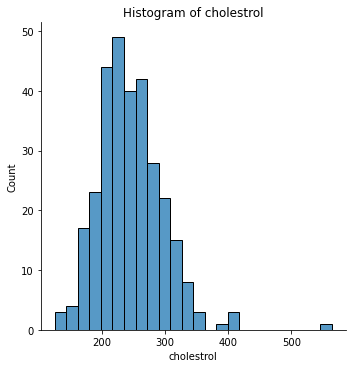

In [332]:
sns.displot(data.cholestrol)
plt.title('Histogram of cholestrol')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of cholestrol')

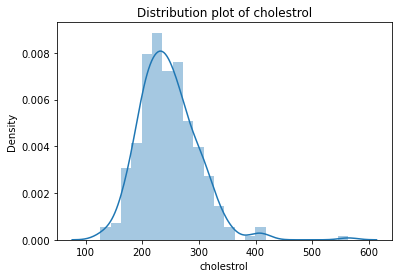

In [333]:
sns.distplot(data.cholestrol)
plt.title('Distribution plot of cholestrol')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of cholestrol')

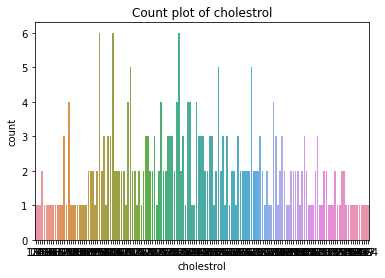

In [334]:
sns.countplot(data.cholestrol)
plt.title('Count plot of cholestrol')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of cholestrol')

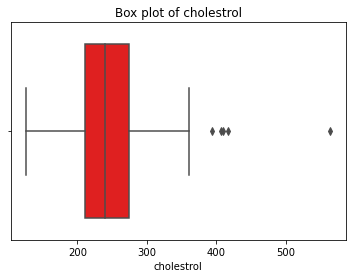

In [335]:
sns.boxplot(data.cholestrol, color = 'r')
plt.title('Box plot of cholestrol')

In [336]:
Q1 = data.cholestrol.quantile(.25)
Q3 = data.cholestrol.quantile(.75)

In [337]:
IQR = Q3 - Q1
IQR

63.5

In [338]:
upper_limit = Q3 + (1.5 * IQR)
upper_limit

369.75

In [339]:
len(data[data.cholestrol > upper_limit])

5

In [340]:
data['cholestrol'] = np.where(data['cholestrol']>upper_limit, upper_limit, data['cholestrol'])

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of cholestrol')

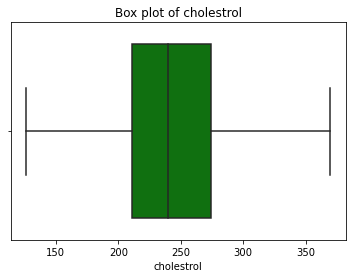

In [341]:
sns.boxplot(data.cholestrol, color = 'g')
plt.title('Box plot of cholestrol')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of cholestrol')

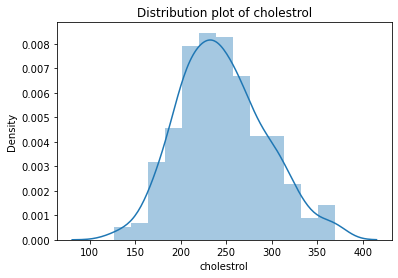

In [342]:
sns.distplot(data.cholestrol)
plt.title('Distribution plot of cholestrol')

In [343]:
data.groupby('cholestrol')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
cholestrol,,,,,,,,
126.00,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
131.00,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
141.00,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
149.00,2.0,0.5,0.707107,0.0,0.25,0.5,0.75,1.0
157.00,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
342.00,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
353.00,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
354.00,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0


In [344]:
cat_1 = data[data['target'] == 0]
cat_2 = data[data['target'] == 1]

ttest_ind(cat_1.cholestrol, cat_2.cholestrol)

Ttest_indResult(statistic=1.8139487083723416, pvalue=0.07068124069134547)

**NOT A GOOD PREDICTOR**

# 

# 

# 5) fasting_blood_sugar

In [345]:
data.fasting_blood_sugar.isnull().sum()

0

In [346]:
data.fasting_blood_sugar.describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fasting_blood_sugar, dtype: float64

In [347]:
data.fasting_blood_sugar.value_counts()

0    258
1     45
Name: fasting_blood_sugar, dtype: int64

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of fasting_blood_sugar')

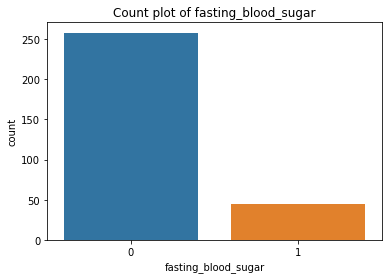

In [348]:
sns.countplot(data.fasting_blood_sugar)
plt.title('Count plot of fasting_blood_sugar')

In [349]:
ct_fbs = pd.crosstab(data.fasting_blood_sugar, data.target)
ct_fbs

target,0,1
fasting_blood_sugar,,
0,116,142
1,22,23


In [350]:
chi2_contingency(ct_fbs, correction = False)

(0.23832909479016698,
 0.6254155436518223,
 1,
 array([[117.5049505, 140.4950495],
        [ 20.4950495,  24.5049505]]))

**NOT A GOOD PREDICTOR**

# 

# 

# 6) rest_ecg

In [351]:
data.rest_ecg.isnull().sum()

0

In [352]:
data.rest_ecg.describe()

count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: rest_ecg, dtype: float64

In [353]:
data.rest_ecg.value_counts()

1    152
0    147
2      4
Name: rest_ecg, dtype: int64

In [354]:
data.rest_ecg.value_counts().sum()

303

Text(0.5, 1.0, 'Histogram of rest_ecg')

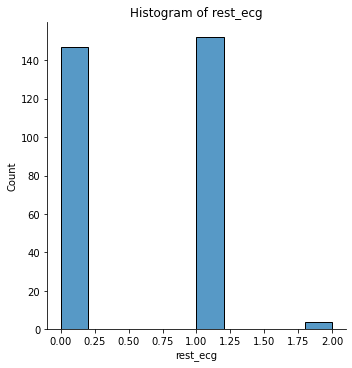

In [355]:
sns.displot(data.rest_ecg)
plt.title('Histogram of rest_ecg')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of rest_ecg')

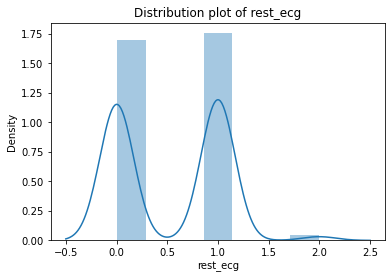

In [356]:
sns.distplot(data.rest_ecg)
plt.title('Distribution plot of rest_ecg')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of rest_ecg')

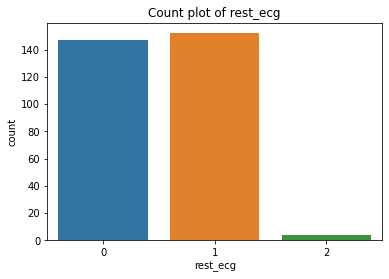

In [357]:
sns.countplot(data.rest_ecg)
plt.title('Count plot of rest_ecg')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of rest_ecg')

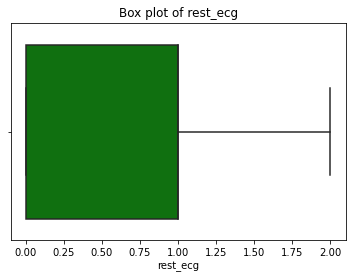

In [358]:
sns.boxplot(data.rest_ecg, color = 'g')
plt.title('Box plot of rest_ecg')

In [359]:
data.groupby('rest_ecg')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
rest_ecg,,,,,,,,
0,147.0,0.462585,0.500303,0.0,0.0,0.0,1.00,1.0
1,152.0,0.631579,0.483971,0.0,0.0,1.0,1.00,1.0
2,4.0,0.250000,0.500000,0.0,0.0,0.0,0.25,1.0


In [360]:
cat_1 = data[data['target'] == 0]
cat_2 = data[data['target'] == 1]

ttest_ind(cat_1.rest_ecg, cat_2.rest_ecg)

Ttest_indResult(statistic=-2.403582514740488, pvalue=0.016839897060126834)

**GOOD PREDICTOR** 

# 

# 

# 7) thalach

In [361]:
data.thalach.isnull().sum()

0

In [362]:
data.thalach.describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [363]:
data.thalach.value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

In [364]:
data.thalach.value_counts().sum()

303

Text(0.5, 1.0, 'Histogram of thalach')

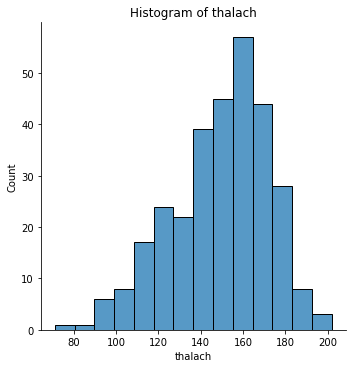

In [365]:
sns.displot(data.thalach)
plt.title('Histogram of thalach')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of thalach')

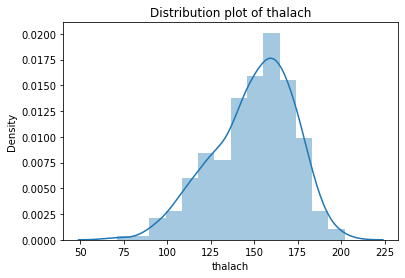

In [366]:
sns.distplot(data.thalach)
plt.title('Distribution plot of thalach')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of thalach')

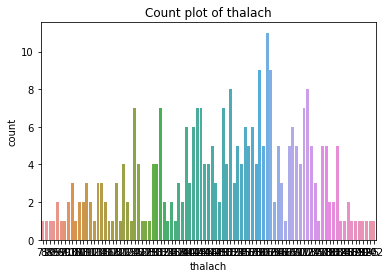

In [367]:
sns.countplot(data.thalach)
plt.title('Count plot of thalach')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of thalach')

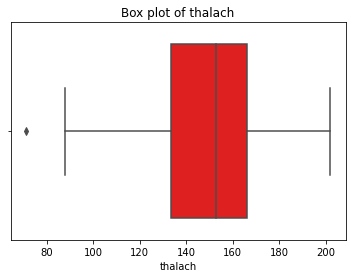

In [368]:
sns.boxplot(data.thalach, color = 'r')
plt.title('Box plot of thalach')

In [369]:
Q1 = data.thalach.quantile(.25)
Q3 = data.thalach.quantile(.75)

In [370]:
IQR = Q3 - Q1
IQR

32.5

In [371]:
lower_limit = Q1 - (1.5 * IQR)
lower_limit

84.75

In [372]:
len(data[data.thalach < lower_limit])

1

In [373]:
data['thalach'] = np.where(data['thalach']<lower_limit, lower_limit, data['thalach'])

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of thalach')

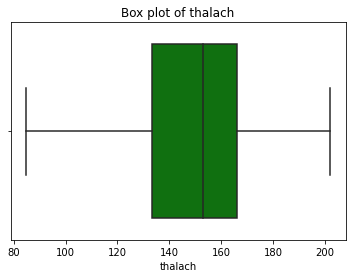

In [374]:
sns.boxplot(data.thalach, color = 'g')
plt.title('Box plot of thalach')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of thalach')

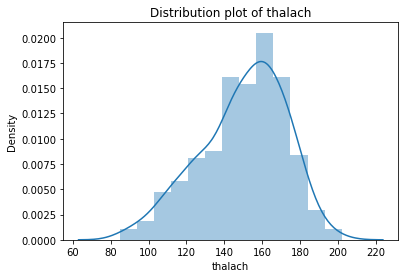

In [375]:
sns.distplot(data.thalach)
plt.title('Distribution plot of thalach')

In [376]:
data.groupby('thalach')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
thalach,,,,,,,,
84.75,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
88.00,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
90.00,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
95.00,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
96.00,2.0,0.5,0.707107,0.0,0.25,0.5,0.75,1.0
...,...,...,...,...,...,...,...,...
190.00,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
192.00,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
194.00,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0


In [377]:
cat_1 = data[data['target'] == 0]
cat_2 = data[data['target'] == 1]

ttest_ind(cat_1.thalach, cat_2.thalach)

Ttest_indResult(statistic=-8.080619328141244, pvalue=1.5770131874781452e-14)

**GOOD PREDICOR** 

# 

# 

# 8) exer_angina

In [378]:
data.exer_angina.isnull().sum()

0

In [379]:
data.exer_angina.describe()

count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exer_angina, dtype: float64

In [380]:
data.exer_angina.value_counts()

0    204
1     99
Name: exer_angina, dtype: int64

In [381]:
data.exer_angina.value_counts().sum()

303

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of exer_angina')

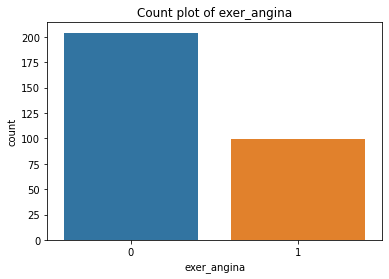

In [382]:
sns.countplot(data.exer_angina)
plt.title('Count plot of exer_angina')

In [383]:
ct_ea = pd.crosstab(data.exer_angina, data.target)
ct_ea

target,0,1
exer_angina,,
0,62,142
1,76,23


In [384]:
chi2_contingency(ct_ea, correction = False)

(57.7992952073631,
 2.9027370724511966e-14,
 1,
 array([[ 92.91089109, 111.08910891],
        [ 45.08910891,  53.91089109]]))

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'exer_angina VS target')

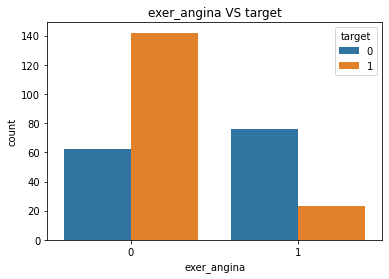

In [385]:
sns.countplot(data.exer_angina, hue= data.target)
plt.title('exer_angina VS target')

**GOOD PREDICTOR**

# 

# 

# 9) old_peak

In [386]:
data.old_peak.isnull().sum()

0

In [387]:
data.old_peak.describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: old_peak, dtype: float64

In [388]:
data.old_peak.value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
0.5     5
1.5     5
3.0     5
2.2     4
3.6     4
0.3     3
2.4     3
0.9     3
4.0     3
3.4     3
2.3     2
1.1     2
4.2     2
3.2     2
2.5     2
3.5     1
1.3     1
3.8     1
6.2     1
5.6     1
3.1     1
2.9     1
4.4     1
0.7     1
2.1     1
Name: old_peak, dtype: int64

In [389]:
data.old_peak.value_counts().sum()

303

Text(0.5, 1.0, 'Histogram of old_peak')

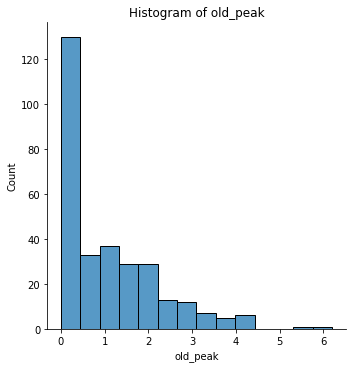

In [390]:
sns.displot(data.old_peak)
plt.title('Histogram of old_peak')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of old_peak')

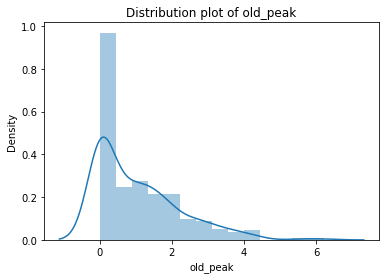

In [391]:
sns.distplot(data.old_peak)
plt.title('Distribution plot of old_peak')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of old_peak')

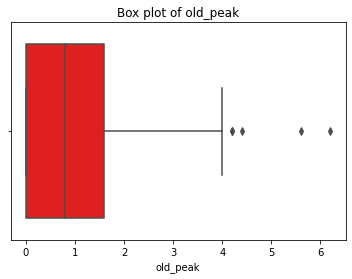

In [392]:
sns.boxplot(data.old_peak, color = 'r')
plt.title('Box plot of old_peak')

In [393]:
Q1 = data.old_peak.quantile(.25)
Q3 = data.old_peak.quantile(.75)

In [394]:
IQR = Q3 - Q1
IQR

1.6

In [395]:
upper_limit = Q3 + (1.5 * IQR)
upper_limit

4.0

In [396]:
len(data[data.old_peak > upper_limit])

5

In [397]:
data['old_peak'] = np.where(data['old_peak'] > upper_limit, upper_limit, data['old_peak'])

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of old_peak')

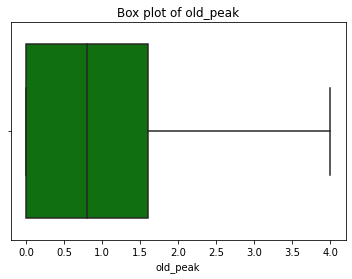

In [398]:
sns.boxplot(data.old_peak, color = 'g')
plt.title('Box plot of old_peak')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of old_peak')

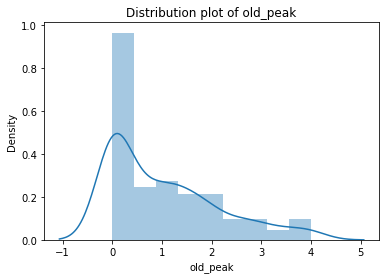

In [399]:
sns.distplot(data.old_peak)
plt.title('Distribution plot of old_peak')

In [400]:
data.groupby('old_peak')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
old_peak,,,,,,,,
0.0,99.0,0.747475,0.436672,0.0,0.50,1.0,1.00,1.0
0.1,7.0,0.571429,0.534522,0.0,0.00,1.0,1.00,1.0
0.2,12.0,0.750000,0.452267,0.0,0.75,1.0,1.00,1.0
0.3,3.0,0.666667,0.577350,0.0,0.50,1.0,1.00,1.0
0.4,9.0,0.888889,0.333333,0.0,1.00,1.0,1.00,1.0
0.5,5.0,0.800000,0.447214,0.0,1.00,1.0,1.00,1.0
0.6,14.0,0.714286,0.468807,0.0,0.25,1.0,1.00,1.0
0.7,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
0.8,13.0,0.538462,0.518875,0.0,0.00,1.0,1.00,1.0


In [401]:
cat_1 = data[data['target'] == 0]
cat_2 = data[data['target'] == 1]

ttest_ind(cat_1.old_peak, cat_2.old_peak)

Ttest_indResult(statistic=8.4214886230112, pvalue=1.5402537989685674e-15)

**GOOD PREDICTOR**

# 

# 

# 10) slope

In [402]:
data.slope.isnull().sum()

0

In [403]:
data.slope.describe()

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64

In [404]:
data.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [405]:
data.slope.value_counts().sum()

303

Text(0.5, 1.0, 'Histogram of slope')

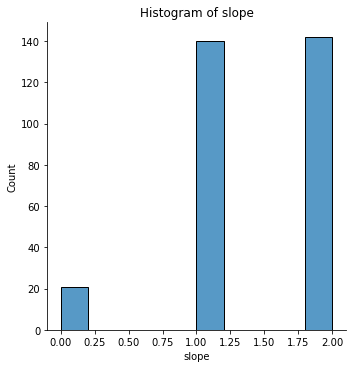

In [406]:
sns.displot(data.slope)
plt.title('Histogram of slope')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of slope')

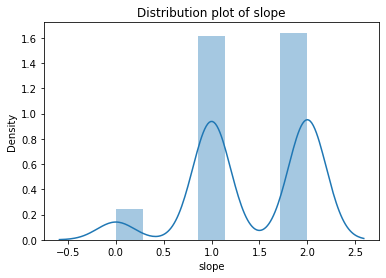

In [407]:
sns.distplot(data.slope)
plt.title('Distribution plot of slope')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of slope')

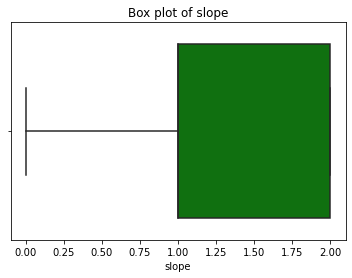

In [408]:
sns.boxplot(data.slope, color = 'g')
plt.title('Box plot of slope')

In [409]:
data.groupby('slope')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
slope,,,,,,,,
0,21.0,0.428571,0.507093,0.0,0.0,0.0,1.0,1.0
1,140.0,0.350000,0.478682,0.0,0.0,0.0,1.0,1.0
2,142.0,0.753521,0.432486,0.0,1.0,1.0,1.0,1.0


In [410]:
cat_1 = data[data['target'] == 0]
cat_2 = data[data['target'] == 1]

ttest_ind(cat_1.slope, cat_2.slope)

Ttest_indResult(statistic=-6.39547266654071, pvalue=6.101610619564808e-10)

**GOOD PREDICTOR** 

# 

# 

# 11) ca

In [411]:
data.ca.isnull().sum()

0

In [412]:
data.ca.describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64

In [413]:
data.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [414]:
data.ca.value_counts().sum()

303

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of ca')

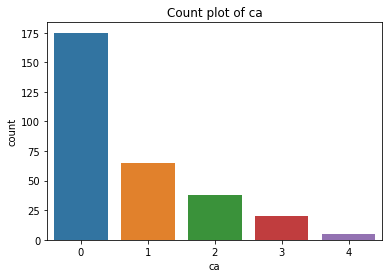

In [415]:
sns.countplot(data.ca)
plt.title('Count plot of ca')

In [416]:
ct_c = pd.crosstab(data.ca, data.target)
ct_c

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


In [417]:
chi2_contingency(ct_c, correction = False)

(74.36663061195097,
 2.712470211959332e-15,
 4,
 array([[79.7029703 , 95.2970297 ],
        [29.6039604 , 35.3960396 ],
        [17.30693069, 20.69306931],
        [ 9.10891089, 10.89108911],
        [ 2.27722772,  2.72277228]]))

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ca VS target')

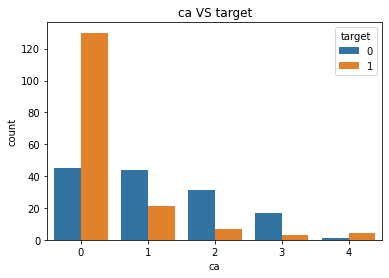

In [418]:
sns.countplot(data.ca, hue = data.target)
plt.title('ca VS target')

**GOOD PREDICTOR**

# 

# 

# 12) thalassemia

In [419]:
data.thalassemia.isnull().sum()

0

In [420]:
data.thalassemia.describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thalassemia, dtype: float64

In [421]:
data.thalassemia.value_counts()

2    166
3    117
1     18
0      2
Name: thalassemia, dtype: int64

In [422]:
data.thalassemia.value_counts().sum()

303

Text(0.5, 1.0, 'Histogram of thalassemia')

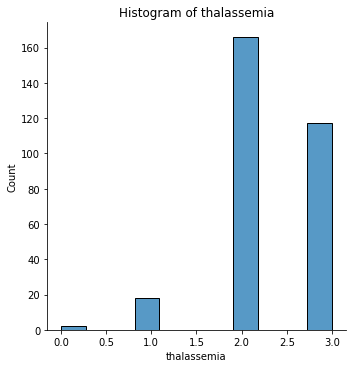

In [423]:
sns.displot(data.thalassemia)
plt.title('Histogram of thalassemia')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of thalassemia')

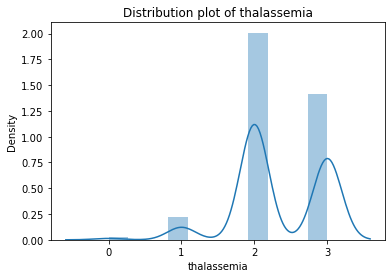

In [424]:
sns.distplot(data.thalassemia)
plt.title('Distribution plot of thalassemia')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of thalassemia')

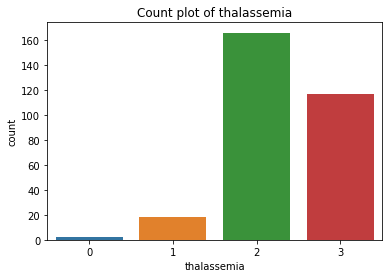

In [425]:
sns.countplot(data.thalassemia)
plt.title('Count plot of thalassemia')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of thalassemia')

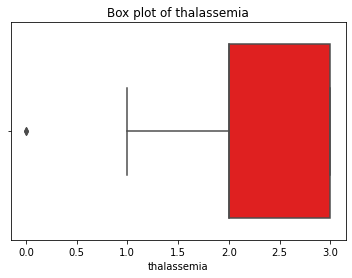

In [426]:
sns.boxplot(data.thalassemia, color = 'r')
plt.title('Box plot of thalassemia')

In [427]:
Q1 = data.thalassemia.quantile(.25)
Q3 = data.thalassemia.quantile(.75)

In [428]:
IQR = Q3 - Q1
IQR

1.0

In [429]:
lower_limit = Q1 - (1.5 * IQR)
lower_limit

0.5

In [430]:
len(data[data.thalassemia < lower_limit])

2

In [431]:
data['thalassemia'] = np.where(data['thalassemia']<lower_limit, 1.0, data['thalassemia'])

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of thalassemia')

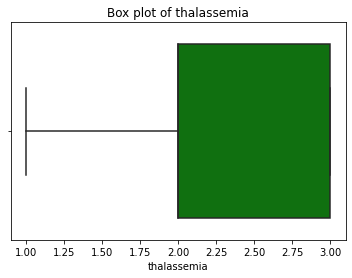

In [432]:
sns.boxplot(data.thalassemia, color = 'g')
plt.title('Box plot of thalassemia')

C:\Users\ymang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of thalassemia')

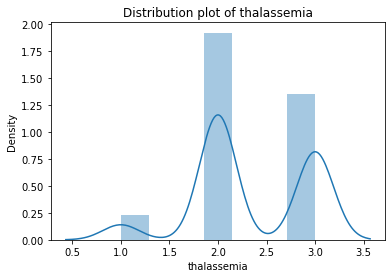

In [433]:
sns.distplot(data.thalassemia)
plt.title('Distribution plot of thalassemia')

In [434]:
data.groupby('thalassemia')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
thalassemia,,,,,,,,
1.0,20.0,0.350000,0.489360,0.0,0.0,0.0,1.0,1.0
2.0,166.0,0.783133,0.413359,0.0,1.0,1.0,1.0,1.0
3.0,117.0,0.239316,0.428501,0.0,0.0,0.0,0.0,1.0


In [435]:
cat_1 = data[data['target'] == 0]
cat_2 = data[data['target'] == 1]

ttest_ind(cat_1.thalassemia, cat_2.thalassemia)

Ttest_indResult(statistic=6.622804721906362, pvalue=1.619796464438705e-10)

**GOOD PREDICTOR**

# 

# GOOD PREDICTOR

**gender**

**chest_pain**

**rest_ecg**

**thalach**

**exer_angina**

**old_peak**

**slope**

**ca**

**thalassemia**

# NOT A GOOD PREDICTOR

**age**

**rest_bps**

**cholestrol**

**fasting_blood_sugar**

# 

In [436]:
data = data.drop(['age', 'rest_bps', 'cholestrol', 'fasting_blood_sugar'], axis = 1)

In [437]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       303 non-null    int64  
 1   chest_pain   303 non-null    int64  
 2   rest_ecg     303 non-null    int64  
 3   thalach      303 non-null    float64
 4   exer_angina  303 non-null    int64  
 5   old_peak     303 non-null    float64
 6   slope        303 non-null    int64  
 7   ca           303 non-null    int64  
 8   thalassemia  303 non-null    float64
 9   target       303 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 23.8 KB


# 

# Create predictors and target variable

In [438]:
x = data.loc[:, data.columns != 'target']
y = data.loc[:, data.columns == 'target']

In [439]:
y.value_counts()

target
1         165
0         138
dtype: int64

# 

# Train and Test data

In [440]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 0)

# 

# Join horizontally x_train and y_train

In [441]:
train = x_train.join(y_train)

In [442]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 137 to 172
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       212 non-null    int64  
 1   chest_pain   212 non-null    int64  
 2   rest_ecg     212 non-null    int64  
 3   thalach      212 non-null    float64
 4   exer_angina  212 non-null    int64  
 5   old_peak     212 non-null    float64
 6   slope        212 non-null    int64  
 7   ca           212 non-null    int64  
 8   thalassemia  212 non-null    float64
 9   target       212 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 26.3 KB


# 

# Count the imbalanced categories

In [443]:
not_t = train[train.target == 0]
len(not_t)

94

In [444]:
t = train[train.target == 1]
len(t)

118

# 

# Make minority class = majority class

In [445]:
not_tos = resample(not_t, replace = True, n_samples = len(t), random_state = 1)

In [446]:
train_os = pd.concat([not_tos, t])

In [447]:
train_os.target.value_counts()

0    118
1    118
Name: target, dtype: int64

# 

# Now make oversampled x_train(os) & y_train(os)

In [448]:
x_train_os = train_os.loc[:, train_os.columns != 'target']
y_train_os = train_os.loc[:, train_os.columns == 'target']

# 

# 

# Build Model

In [449]:
clf = tree.DecisionTreeClassifier()

In [450]:
clfFit = clf.fit(x_train_os, y_train_os)

In [451]:
clfFit

DecisionTreeClassifier()

# 

# Plot

[Text(185.6423076923077, 206.56799999999998, 'X[3] <= 158.5\ngini = 0.5\nsamples = 236\nvalue = [118, 118]'),
 Text(83.7, 184.824, 'X[0] <= 0.5\ngini = 0.449\nsamples = 153\nvalue = [101, 52]'),
 Text(34.33846153846154, 163.07999999999998, 'X[4] <= 0.5\ngini = 0.42\nsamples = 40\nvalue = [12, 28]'),
 Text(17.16923076923077, 141.336, 'X[7] <= 1.5\ngini = 0.238\nsamples = 29\nvalue = [4, 25]'),
 Text(8.584615384615384, 119.592, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(25.753846153846155, 119.592, 'X[3] <= 151.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(17.16923076923077, 97.848, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(34.33846153846154, 97.848, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(51.50769230769231, 141.336, 'X[5] <= 0.6\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(42.92307692307692, 119.592, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(60.09230769230769, 119.592, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(133.06153846153845,

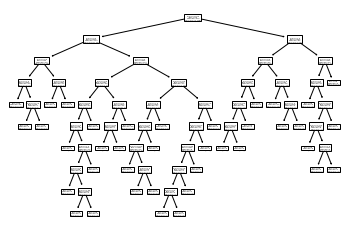

In [452]:
tree.plot_tree(clfFit)

# 

# Tree Plot

In [453]:
#import graphviz

In [454]:
#dot_data = tree

# 

# Prediction

In [455]:
y_predict = clfFit.predict(x_test)

In [458]:
cm_tree = pd.crosstab(y_test.target, y_predict, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

In [459]:
cm_tree

Predicted,0,1,All
Actual,,,
0,32,12,44
1,9,38,47
All,41,50,91


# 

#  Result

In [467]:
confusion_matrix(y_test, y_predict)

array([[32, 12],
       [ 9, 38]], dtype=int64)

In [468]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75        44
           1       0.76      0.81      0.78        47

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



### 

# accuracy

In [469]:
accuracy_score(y_test, y_predict)

0.7692307692307693

# 

# ROC Curve

In [470]:
predictedProbability_tree = clfFit.predict_proba(x_test)[:, 1]

In [473]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictedProbability_tree)

In [474]:
fpr

array([0.        , 0.27272727, 1.        ])

In [475]:
tpr

array([0.        , 0.80851064, 1.        ])

In [476]:
thresholds

array([2., 1., 0.])

# 

# Put fpr and tpr in a dat frame 

In [477]:
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))

In [478]:
auc = auc(fpr, tpr)

In [479]:
auc

0.7678916827852998

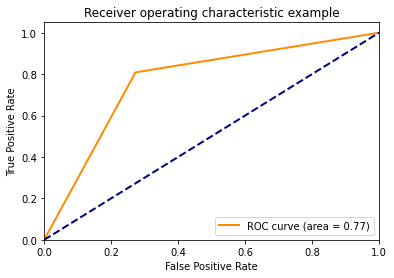

In [480]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()